             Open   High    Low  Close  Volume  Ex-Dividend  Split Ratio  \
Date                                                                       
2004-08-19  False  False  False  False   False        False        False   
2004-08-20  False  False  False  False   False        False        False   
2004-08-23  False  False  False  False   False        False        False   
2004-08-24  False  False  False  False   False        False        False   
2004-08-25  False  False  False  False   False        False        False   
...           ...    ...    ...    ...     ...          ...          ...   
2018-03-21  False  False  False  False   False        False        False   
2018-03-22  False  False  False  False   False        False        False   
2018-03-23  False  False  False  False   False        False        False   
2018-03-26  False  False  False  False   False        False        False   
2018-03-27  False  False  False  False   False        False        False   

           

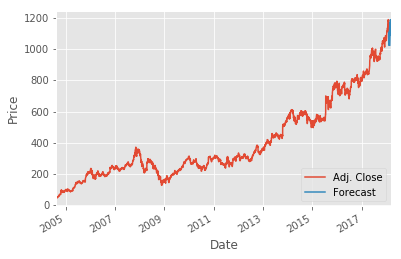

In [29]:
import os
import pandas as pd
import quandl
import math, datetime
import numpy as np
from sklearn import preprocessing, cross_validation, svm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import pickle


df = quandl.get("WIKI/GOOGL", api_key = "srzGWDhYdaeirgvZua2M")
print(df.isnull())
df = df[['Adj. Open', 'Adj. High', 'Adj. Low', 'Adj. Close','Adj. Volume']]
df['HL_PCT'] = (df['Adj. High'] - df['Adj. Close'])/ df['Adj. Close'] * 100
df['PCT_change'] = (df['Adj. Close'] - df['Adj. Open'])/ df['Adj. Open'] * 100
df = df[['Adj. Close', 'HL_PCT', 'PCT_change', 'Adj. Volume']]
print(df)


forecast_col = 'Adj. Close'
df.fillna(-99999, inplace=True)
forecast_out = int(math.ceil(0.01*len(df)))
print(forecast_out)
df['label'] = df[forecast_col].shift(-forecast_out)

print(df.head())
print(df.tail())

X = np.array(df.drop(['label'],1))#drops all the labels prices except the lable heading it self
X = preprocessing.scale(X)
print(X)


X_lately = X[-forecast_out:]
X = X[:-forecast_out]

df.dropna(inplace=True)
y = np.array(df["label"])#drops all the labels prices except the lable heading it self
y = np.array(df["label"])#drops all the labels prices except the lable heading it self


print(len(X), len(y))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

clf = LinearRegression(n_jobs =-1)
clf.fit(X_train, y_train)

with open('linearregression.pickle', 'wb') as f:
    pickle.dump(clf, f)
    
    
pickle_in = open('linearregression.pickle', 'rb')
clf = pickle.load(pickle_in)

accuracy = clf.score(X_test, y_test)


forecast_set = clf.predict(X_lately)

print(forecast_set, accuracy, forecast_out)

df["Forecast"] = np.nan
print(df["Forecast"])

last_date = df.iloc[-1].name
last_unix = last_date.timestamp()
one_day = 86400
next_unix = last_unix + one_day

for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += one_day
    
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)] + [i]
    
df['Adj. Close'].plot()
df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.figure(figsize=(15,4),dpi=70)
plt.show()






0.5464105057999586


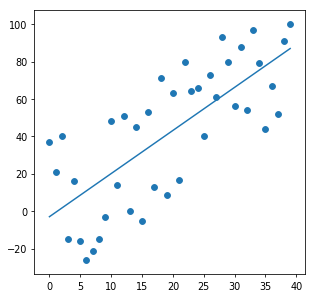

In [26]:
import matplotlib.pyplot as plt
from statistics import mean
import numpy as np
import random
#xs = np.array([1,2,3,4,5,6], dtype = np.float64)
#ys = np.array([5,4,6,5,6,7], dtype = np.float64)


def create_dataset(hm, variance, step=2, correlation=False):
    val = 1
    ys =[]
    for i in range(hm):
        y = val + random.randrange(-variance, variance)
        ys.append(y)
        if correlation and correlation =='pos':
            val += step
        elif correlation and correlation=='neg':
            val -= step
    xs = [i for i in range(len(ys))]
    return np.array(xs, dtype=np.float64), np.array(ys, dtype=np.float64)






def slope_regression_and_intercept(xs, ys):
    
    m = ((mean(xs) * mean(ys))-(mean(xs*ys))) / ((mean(xs)**2)-(mean(xs**2)))
    
    b = mean(ys) - m*mean(xs)
    
    return (m,b)

#print(slope_regression_and_intercept(xs, ys))


def squared_error(ys_orig, ys_line):
    return sum((ys_line-ys_orig)**2)


def coefficient_of_determin(ys_orig, ys_line):
    
    y_mean_line = [mean(ys_orig) for y in ys_orig]
    squared_error_regr = squared_error(ys_orig, ys_line)
    squared_error_y_mean = squared_error(ys_orig, y_mean_line)
    return 1- ( squared_error_regr / squared_error_y_mean)
 
    
xs, ys= create_dataset(40, 40, step=2, correlation='pos')
    

m,b = slope_regression_and_intercept(xs, ys)

regression_line = [m*x+b for x in xs]

coefficent_o_d = coefficient_of_determin(ys, regression_line)


print(coefficent_o_d)
predict_x = 8
predict_y = m*predict_x +b

plt.figure(figsize=(5,5), dpi=70)
plt.plot(predict_x,predict_y,color="g")
plt.plot(xs,regression_line)
plt.scatter(xs,ys)
plt.show()

In [20]:
x = np.array([15,19,10,11])
z = np.array([15,19,10,11])

print(x-z)

[0 0 0 0]


       YearsExperience         Salary
count        30.000000      30.000000
mean          5.313333   76003.000000
std           2.837888   27414.429785
min           1.100000   37731.000000
25%           3.200000   56720.750000
50%           4.700000   65237.000000
75%           7.700000  100544.750000
max          10.500000  122391.000000


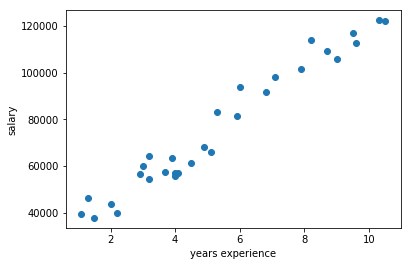

(9449.962321455081, 25792.200198668666)
our answer -799229550.7120179


In [46]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from statistics import mean
df = pd.read_csv("salary.csv")
print(df.describe())
x = np.array(df["YearsExperience"])
y = np.array(df["Salary"])
plt.xlabel("years experience")
plt.ylabel("salary")
plt.scatter(df["YearsExperience"],df["Salary"] )
plt.show()


#regression formula
def regression_function(x,y):
    m = ((mean(x) * mean(y))-(mean(x*y))) / ((mean(x)**2)-(mean(x**2)))
    b = mean(y) - m*mean(x)
    
    return m,b

print(regression_function(x,y))


m,b = regression_function(x,y)
Z = [m*a + b for a in y]


def squared_error(ys_orig, ys_line):
    return sum((ys_line-ys_orig)**2)


def coefficient_of_determin(ys_orig, ys_line):
    
    y_mean_line = [mean(ys_orig) for y in ys_orig]
    squared_error_regr = squared_error(ys_orig, ys_line)
    squared_error_y_mean = squared_error(ys_orig, y_mean_line)
    return 1- ( squared_error_regr / squared_error_y_mean)


coefficent_o_d = coefficient_of_determin(y,Z)
print("our answer", coefficent_o_d)

In [47]:
t = np.linspace(0,12,7)
print(t)

[ 0.  2.  4.  6.  8. 10. 12.]
